In [1]:
import os
import sys
cwd = os.getcwd()
new_wd = '../src/visualization/'

os.chdir(new_wd)
from multistats import getstats
os.chdir(cwd)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from dateutil import relativedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/raw_consolidated_data.csv', sep='~', encoding='utf-8', low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185909 entries, 0 to 185908
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   file_name           185909 non-null  object 
 1   sheet_name          185909 non-null  object 
 2   trans_date          185908 non-null  object 
 3   trans_vat_desc      176065 non-null  object 
 4   original_gross_amt  185908 non-null  float64
 5   original_cur        54229 non-null   object 
 6   merchant_name       185908 non-null  object 
 7   card_number         185908 non-null  object 
 8   billing_gross_amt   54229 non-null   float64
 9   billing_cur_code    88696 non-null   object 
 10  billing_cur_code_1  4598 non-null    object 
 11  trans_tax_amt       4598 non-null    float64
 12  trans_cac_code_1    185804 non-null  object 
 13  trans_cac_desc_1    185804 non-null  object 
 14  trans_cac_code_2    185673 non-null  object 
 15  trans_cac_desc_2    185673 non-nul

,file_name,sheet_name,trans_date,trans_vat_desc,original_gross_amt,original_cur,merchant_name,card_number,billing_gross_amt,billing_cur_code,billing_cur_code_1,trans_tax_amt,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate,unnamed
0,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-03,VR,72.61,GBP,shell kings 587,************5770,72.61,GBP,NaN,NaN,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities,NaN
1,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-24,VR,85.51,GBP,shell fiveways 387,************1147,85.51,GBP,NaN,NaN,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN
2,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-02-01,VR,10.09,GBP,shell fiveways 387,************1147,10.09,GBP,NaN,NaN,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN
3,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-04,VR,20.00,GBP,mibsons service st,************5804,20.00,GBP,NaN,NaN,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN
4,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-05,VR,50.00,GBP,malthurst petroleu,************5804,50.00,GBP,NaN,NaN,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN


___________
### Review missing data

In [3]:
df.isna().sum()

file_name                  0
sheet_name                 0
trans_date                 1
trans_vat_desc          9844
original_gross_amt         1
original_cur          131680
merchant_name              1
card_number                1
billing_gross_amt     131680
billing_cur_code       97213
billing_cur_code_1    181311
trans_tax_amt         181311
trans_cac_code_1         105
trans_cac_desc_1         105
trans_cac_code_2         236
trans_cac_desc_2         236
trans_cac_code_3         293
directorate             4697
unnamed               181950
dtype: int64

There are a full row with null values, it only have data on the columns **file_name** and **sheet_name**. In the next cell that row is deleted from the dataframe.

In [4]:
df.drop(df[df['trans_date'].isna()].index, inplace=True)

### Ploting a nullity matrix to identify null patterns between columns

<AxesSubplot:>

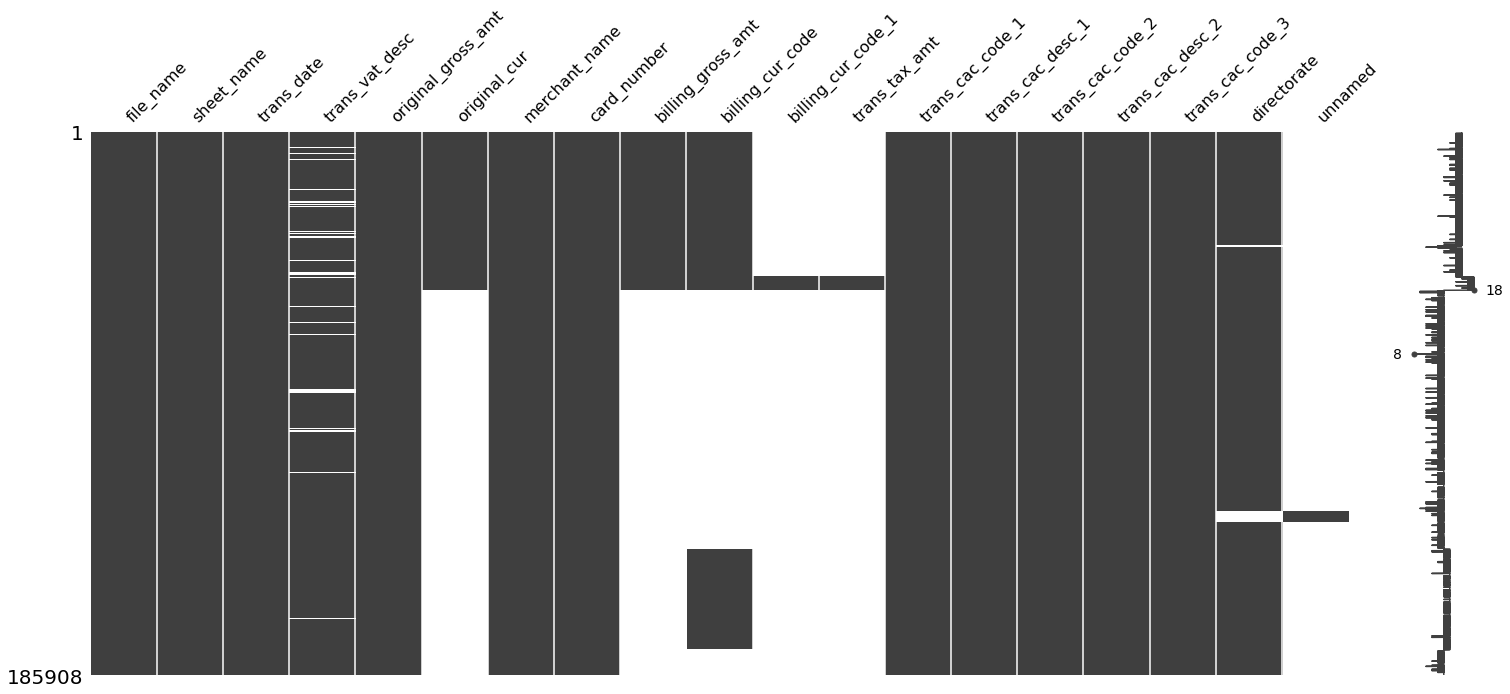

In [5]:
msno.matrix(df.sort_values(by=['file_name', 'sheet_name']))

In [6]:
col = 'original_cur'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values:')
print(df[col].isna().value_counts().reset_index().replace({True:'Null',False:'Not Null'}))

col = 'billing_gross_amt'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values:')
print(df[col].isna().value_counts().reset_index().replace({True:'Null',False:'Not Null'}))

col = 'billing_cur_code'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values and only one class when is not null:')
print(df[col].value_counts(dropna=False))

col = 'billing_cur_code_1'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values and only one class when is not null:')
print(df[col].value_counts(dropna=False))

col = 'trans_tax_amt'
print('-'*100 + f'\nColumn {col} have {df[col].isna().sum()/df.shape[0]:.1%} of null values:')
print(df[col].isna().value_counts().reset_index().replace({True:'Null',False:'Not Null'}))

----------------------------------------------------------------------------------------------------
Column original_cur have 70.8% of null values:
      index  original_cur
0      Null        131679
1  Not Null         54229
----------------------------------------------------------------------------------------------------
Column billing_gross_amt have 70.8% of null values:
      index  billing_gross_amt
0      Null             131679
1  Not Null              54229
----------------------------------------------------------------------------------------------------
Column billing_cur_code have 52.3% of null values and only one class when is not null:
NaN    97212
GBP    88696
Name: billing_cur_code, dtype: int64
----------------------------------------------------------------------------------------------------
Column billing_cur_code_1 have 97.5% of null values and only one class when is not null:
NaN    181310
GBP      4598
Name: billing_cur_code_1, dtype: int64
--------------------

In [7]:
print(f"Classes for the column directorate:\n{df['directorate'].value_counts(dropna=False)}")
print(f"\nClasses for the column unnamed:\n{df['unnamed'].value_counts(dropna=False)}")

Classes for the column directorate:
CYP&F SCHOOLS                   85612
Local Services                  41676
CYP&F                           23837
Corporate Resources             12205
Adult & Communities             12150
NaN                              4697
DEVELOPMENT                      3810
Adult Social Care and Health      564
CYP&F                             513
CYP&F Schools                     457
CYP&F                             127
CYO&F                              87
Adults & Comms                     50
Development                        41
Local services                     39
Adults                             24
Adults & Communities               16
Corporate Procurement               3
Name: directorate, dtype: int64

Classes for the column unnamed:
NaN                    181949
CYP&F SCHOOLS            1920
Local Services            716
CYP&F                     630
Corporate Resources       259
Adult & Communities       217
DEVELOPMENT               173
CYP&F

In [8]:
df['directorate_completed'] = df.apply(lambda x: x['unnamed'] if str(x['directorate'])=='nan' and str(x['unnamed'])!='nan' else x['directorate'], axis=1)
df['directorate_completed'].value_counts(dropna=False)

CYP&F SCHOOLS                   87532
Local Services                  42392
CYP&F                           24467
Corporate Resources             12464
Adult & Communities             12367
DEVELOPMENT                      3983
NaN                               738
Adult Social Care and Health      564
CYP&F                             548
CYP&F Schools                     459
CYP&F                             127
CYO&F                              93
Adults & Comms                     51
Development                        41
Local services                     39
Adults                             24
Adults & Communities               16
Corporate Procurement               3
Name: directorate_completed, dtype: int64

In [9]:
cols = ['unnamed', 'directorate', 'original_cur', 'billing_gross_amt', 'billing_cur_code', 'billing_cur_code_1', 'trans_tax_amt', 'trans_vat_desc']
df.drop(columns=cols, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185908 entries, 0 to 185908
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   file_name              185908 non-null  object 
 1   sheet_name             185908 non-null  object 
 2   trans_date             185908 non-null  object 
 3   original_gross_amt     185908 non-null  float64
 4   merchant_name          185908 non-null  object 
 5   card_number            185908 non-null  object 
 6   trans_cac_code_1       185804 non-null  object 
 7   trans_cac_desc_1       185804 non-null  object 
 8   trans_cac_code_2       185673 non-null  object 
 9   trans_cac_desc_2       185673 non-null  object 
 10  trans_cac_code_3       185616 non-null  object 
 11  directorate_completed  185170 non-null  object 
dtypes: float64(1), object(11)
memory usage: 18.4+ MB


,file_name,sheet_name,trans_date,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate_completed
0,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-03,72.61,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-24,85.51,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
2,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-02-01,10.09,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
3,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-04,20.00,mibsons service st,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities
4,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-05,50.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities


**Analisis**
1. Based on the comments above the columns original_cur, billing_gross_amt, billing_cur_code, billing_cur_code_1 and trans_tax_amt will be deleted from the dataframe.
2. Based on the nullity matrix and the cell above the columns **unnamed** and **directorate** will be deleted after is used to complete the **directorate_completed** column.
3. The column named **directorate_completed** have the **directorate** column completed with the column **unnamed**, and reduced the null values from 4697 to 738 (84.3% of reduction).

<AxesSubplot:>

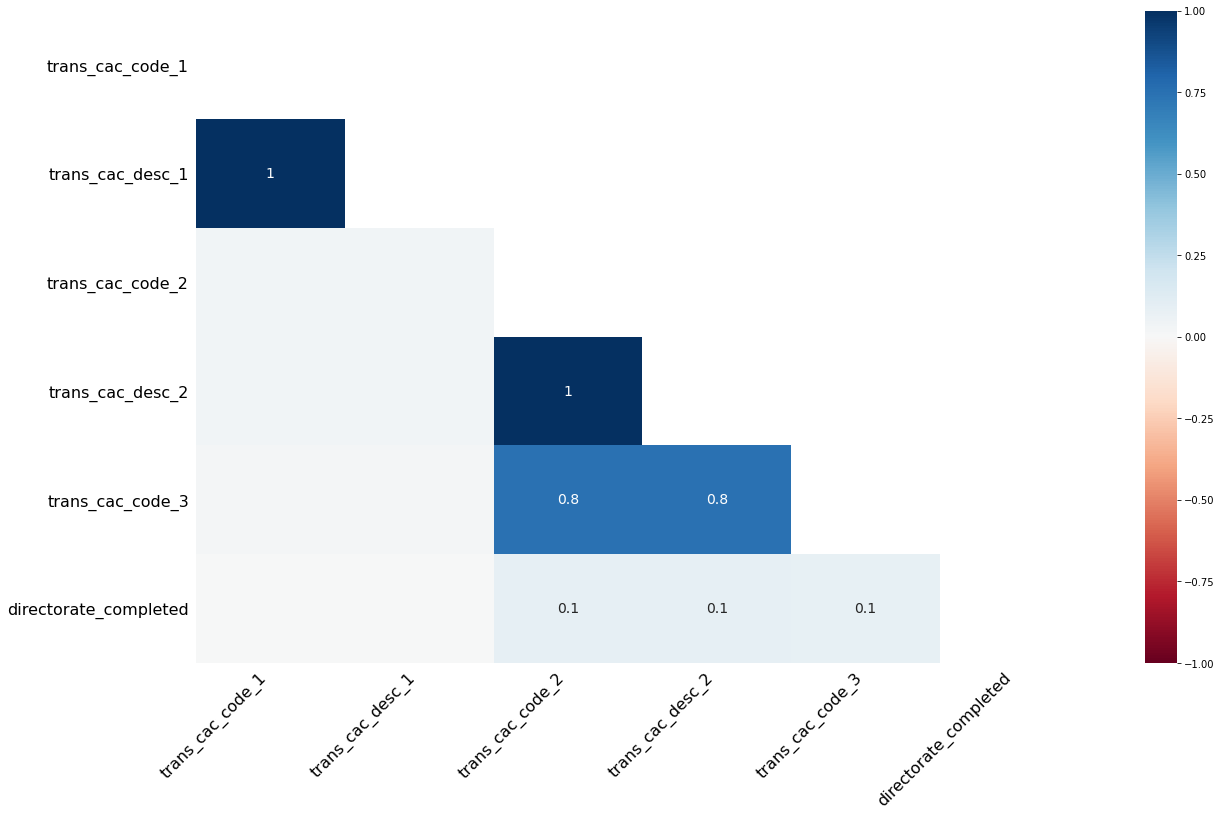

In [10]:
msno.heatmap(df.sort_values(by=['file_name', 'sheet_name']))

**Note**: The columns **trans_cac_code_1**, **trans_cac_desc_1**, **trans_cac_code_2**, **trans_cac_desc_2** have a strong correlation on the absence of variables, that could mean that are missing from the source of the data.  

Imputing classes:  
1. **trans_cac_code_1**: i will group the non null dataset by **trans_cac_code_2** and **trans_cac_code_1** and identify the mode of **trans_cac_code_1** by each **trans_cac_code_2**, and use it to impute the values of **trans_cac_code_1_imputed**.
2. **trans_cac_desc_1**: i will group the non null dataset by  **trans_cac_code_1** and **trans_cac_desc_1** to fill the new column named **trans_cac_desc_1_imputed** crossing by **trans_cac_code_1**.
3. **trans_cac_code_2**: i will group the non null dataset by **trans_cac_code_3** and **trans_cac_code_2** and identify the mode of **trans_cac_code_2** by each **trans_cac_code_3**, and use it to impute the values of **trans_cac_code_2_imputed**.
4. **trans_cac_desc_2**: i will group the non null dataset by  **trans_cac_code_2** and **trans_cac_desc_2** to fill the new column named **trans_cac_desc_2_imputed** crossing by **trans_cac_code_2**.
5. **Drop Columns**: Drop the temporal columns used for the process.

### 1. trans_cac_code_1_imputed

**1.1** Creating the dimensions table with unique **trans_cac_code_2** with the mos frecuent value of **trans_cac_code_1**

In [11]:
df_to_impute = df.groupby(
    ['trans_cac_code_2', 'trans_cac_code_1'],
    as_index=False
)['sheet_name'].count().sort_values(by='sheet_name', ascending=False).drop_duplicates(subset='trans_cac_code_2', keep='first').rename(columns={'sheet_name':'#'})

df_to_impute.head()

,trans_cac_code_2,trans_cac_code_1,#
6382,RJADC,N060,8383
8247,RUF0F,H0R0,6012
292,RBF40,K020,1374
8437,RV014,L0J0,1299
1163,REAAB,L220,1204


**1.2** Merging the dataframes df with the df_to_impute to create the column **trans_cac_code_1_to_impute** on df.

In [12]:
df['trans_cac_code_1_to_impute'] = pd.merge(
    left = df,
    right = df_to_impute,
    how = 'left',
    on = 'trans_cac_code_2',
    indicator = 'cruce'
)['trans_cac_code_1_y']

**1.3** Creating the column **trans_cac_code_1_imputed** on df imputing the null values of **trans_cac_code_1** with the **trans_cac_code_1_to_impute**.

In [13]:
df['trans_cac_code_1_imputed'] = df.apply(lambda x: x['trans_cac_code_1_to_impute'] if str(x['trans_cac_code_1'])=='nan' else x['trans_cac_code_1'], axis=1)

### 2. trans_cac_desc_1_imputed

**2.1** Creating the dimensions table with unique **trans_cac_code_2** with the most frecuent value of **trans_cac_code_1**

In [14]:
cols = ['trans_cac_code_1', 'trans_cac_desc_1', 'sheet_name']
df_trans_cac_1 = df[cols].groupby(cols[:-1], as_index=False)[cols[-1]].count().sort_values(by='sheet_name', ascending=False).rename(columns={'sheet_name':'#'})

print(f"Number of duplicated trans_cac_code_1: {df_trans_cac_1.duplicated(subset='trans_cac_code_1').sum():,.0f}\n")

df_trans_cac_1.head()

Number of duplicated trans_cac_code_1: 0



,trans_cac_code_1,trans_cac_desc_1,#
72,L100,Equip Operational,34433
46,K020,Vehicle Fuel,22907
77,L220,Purchases Food,20606
62,L030,Books,11611
125,MC70,Supplies & Sev Mic,10761


**2.2** Merging the dataframes df with the df_trans_cac_1 to create the column **trans_cac_desc_1_imputed** on df.

In [15]:
df['trans_cac_desc_1_imputed'] = pd.merge(
    left = df,
    right = df_trans_cac_1,
    how = 'left',
    on = 'trans_cac_code_1',
    indicator = 'cruce'
)['trans_cac_desc_1_y']

### 3. trans_cac_code_2_imputed

**3.1** Creating the dimensions table with unique **trans_cac_code_3** with the most frecuent value of **trans_cac_code_2**

In [16]:
df_to_impute = df.groupby(
    ['trans_cac_code_3', 'trans_cac_code_2'],
    as_index=False
)['sheet_name'].count().sort_values(by='sheet_name', ascending=False).drop_duplicates(subset='trans_cac_code_3', keep='first').rename(columns={'sheet_name':'#'})

df_to_impute.head()

,trans_cac_code_3,trans_cac_code_2,#
976,A00,RUF0F,13839
1426,A5F,REAYY,525
1407,A46,RET1K,43
1443,A8H,TA-01487-01,27
1422,A5D,RUBJJ,27


**3.2** Merging the dataframes df with the df_to_impute to create the column **trans_cac_code_2_to_impute** on df.

In [17]:
df['trans_cac_code_2_to_impute'] = pd.merge(
    left = df,
    right = df_to_impute,
    how = 'left',
    on = 'trans_cac_code_3',
    indicator = 'cruce'
)['trans_cac_code_2_y']

**3.3** Creating the column **trans_cac_code_2_imputed** on df imputing the null values of **trans_cac_code_2** with the **trans_cac_code_2_to_impute**.

In [18]:
df['trans_cac_code_2_imputed'] = df.apply(lambda x: x['trans_cac_code_2_to_impute'] if str(x['trans_cac_code_2'])=='nan' else x['trans_cac_code_2'], axis=1)

### 4. trans_cac_desc_2_imputed

**4.1** Creating the dimensions table with unique **trans_cac_code_3** with the most frecuent value of **trans_cac_code_2**

In [19]:
cols = ['trans_cac_code_2', 'trans_cac_desc_2', 'sheet_name']
df_trans_cac_2 = df[cols].groupby(cols[:-1], as_index=False)[cols[-1]].count().sort_values(by='sheet_name', ascending=False).rename(columns={'sheet_name':'#'})

print(f"Number of duplicated trans_cac_code_2: {df_trans_cac_2.duplicated(subset='trans_cac_code_2').sum():,.0f}\n")

df_trans_cac_2.head()

Number of duplicated trans_cac_code_2: 3



,trans_cac_code_2,trans_cac_desc_2,#
984,RUF0F,Illegal Money Lending T Stds Comm Inv.,13839
642,RJADC,Homeless Private Sector Accom,8558
228,REAAB,The City of Birmingham School,5058
1001,RV014,Camborne House HLDC,3121
698,RLBMC,Technical Unit,2596


**4.2** Merging the dataframes df with the df_trans_cac_2 to create the column **trans_cac_desc_2_imputed** on df.

In [20]:
df['trans_cac_desc_2_imputed'] = pd.merge(
    left = df,
    right = df_trans_cac_2,
    how = 'left',
    on = 'trans_cac_code_2',
    indicator = 'cruce'
)['trans_cac_desc_2_y']

### 5. Drop Columns

**5.1** Droping columns
1. Temporal columns used to the impute process: **trans_cac_code_1**, **trans_cac_desc_1**, **trans_cac_code_2**, **trans_cac_desc_2**, **trans_cac_code_1_to_impute**, **trans_cac_code_2_to_impute**
2. Columns that will not going to be used into the analisis:
    - **trans_cac_code_3**: We don't have info about the meaning of each code or the name of the class. The codes of **trans_cac_code_3** are diferent than the codes of **trans_cac_code_1** or **trans_cac_code_2**

In [21]:
cols = ['trans_cac_code_1', 'trans_cac_desc_1', 'trans_cac_code_2', 'trans_cac_desc_2', 'trans_cac_code_1_to_impute', 'trans_cac_code_2_to_impute', 'trans_cac_code_3']
df.drop(columns=cols, inplace=True)

**5.2** Sort columns on df

In [22]:
cols = ['file_name', 'sheet_name', 'trans_date', 'original_gross_amt', 'merchant_name', 'card_number', 'trans_cac_code_1_imputed',
        'trans_cac_desc_1_imputed', 'trans_cac_code_2_imputed', 'trans_cac_desc_2_imputed', 'directorate_completed']
df = df[cols].copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185908 entries, 0 to 185908
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 185908 non-null  object 
 1   sheet_name                185908 non-null  object 
 2   trans_date                185908 non-null  object 
 3   original_gross_amt        185908 non-null  float64
 4   merchant_name             185908 non-null  object 
 5   card_number               185908 non-null  object 
 6   trans_cac_code_1_imputed  185903 non-null  object 
 7   trans_cac_desc_1_imputed  185803 non-null  object 
 8   trans_cac_code_2_imputed  185758 non-null  object 
 9   trans_cac_desc_2_imputed  185673 non-null  object 
 10  directorate_completed     185170 non-null  object 
dtypes: float64(1), object(10)
memory usage: 17.0+ MB


,file_name,sheet_name,trans_date,original_gross_amt,merchant_name,card_number,trans_cac_code_1_imputed,trans_cac_desc_1_imputed,trans_cac_code_2_imputed,trans_cac_desc_2_imputed,directorate_completed
0,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-03,72.61,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,Adult & Communities
1,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-24,85.51,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,Adult & Communities
2,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-02-01,10.09,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,Adult & Communities
3,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-04,20.00,mibsons service st,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,Adult & Communities
4,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-05,50.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,Adult & Communities


<AxesSubplot:>

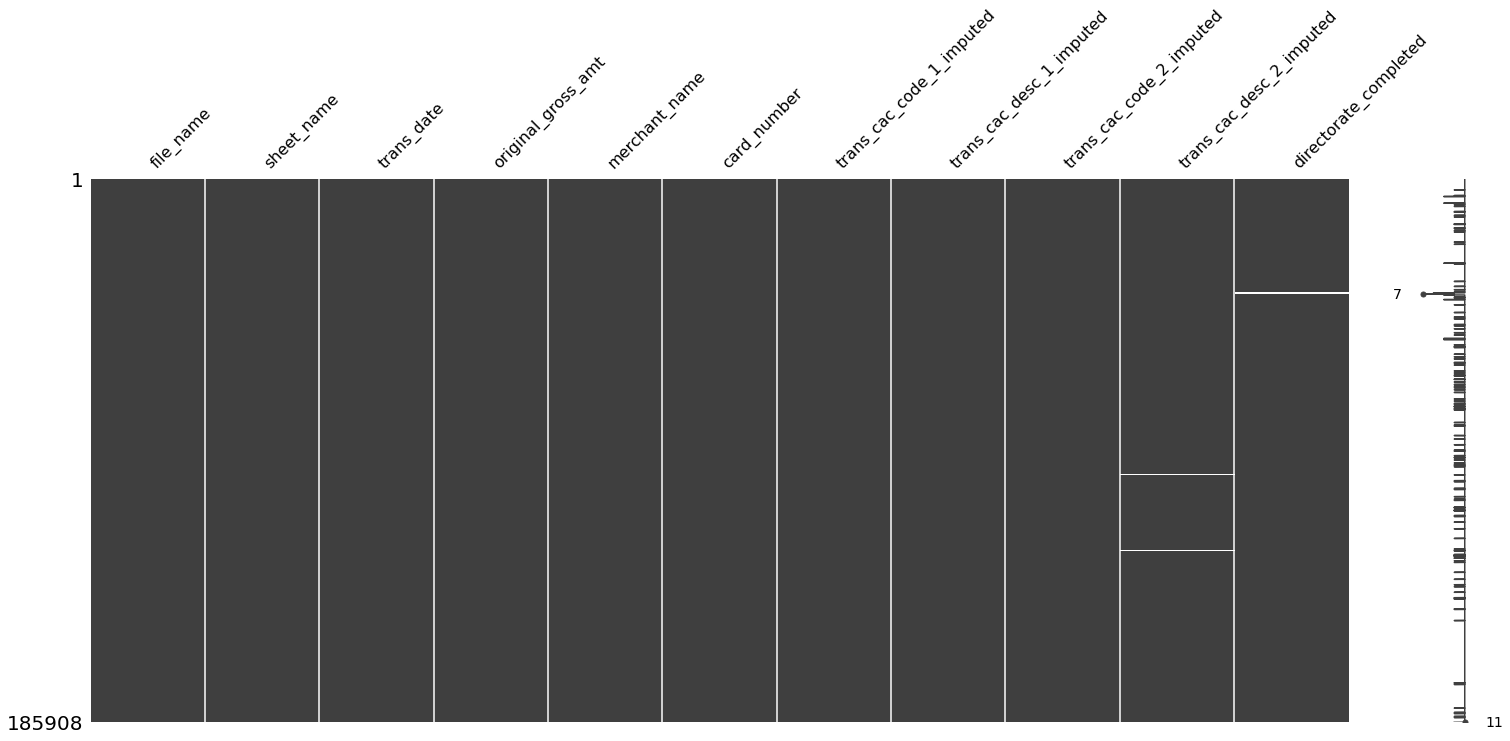

In [23]:
msno.matrix(df.sort_values(by=['file_name', 'sheet_name']))

### Nulls after imputation by class process

In [24]:
null_df = df.isna().sum().reset_index().rename(columns={0:'#', 'index':'column'})
null_df['%'] = null_df['#'].apply(lambda x: f"{x/df.shape[0]:.2%}")
null_df

,column,#,%
0,file_name,0,0.00%
1,sheet_name,0,0.00%
2,trans_date,0,0.00%
3,original_gross_amt,0,0.00%
4,merchant_name,0,0.00%
5,card_number,0,0.00%
6,trans_cac_code_1_imputed,5,0.00%
7,trans_cac_desc_1_imputed,105,0.06%
8,trans_cac_code_2_imputed,150,0.08%
9,trans_cac_desc_2_imputed,235,0.13%


**Note**: The next values will be imputed by the mode of the total column.

In [25]:
cols = ['trans_cac_code_1_imputed', 'trans_cac_desc_1_imputed', 'trans_cac_code_2_imputed', 'trans_cac_desc_2_imputed', 'directorate_completed']
for col in cols:
    df[col].fillna(df[col].mode().values[0], inplace=True)

In [26]:
null_df = df.isna().sum().reset_index().rename(columns={0:'#', 'index':'column'})
null_df['%'] = null_df['#'].apply(lambda x: f"{x/df.shape[0]:.2%}")
null_df

,column,#,%
0,file_name,0,0.00%
1,sheet_name,0,0.00%
2,trans_date,0,0.00%
3,original_gross_amt,0,0.00%
4,merchant_name,0,0.00%
5,card_number,0,0.00%
6,trans_cac_code_1_imputed,0,0.00%
7,trans_cac_desc_1_imputed,0,0.00%
8,trans_cac_code_2_imputed,0,0.00%
9,trans_cac_desc_2_imputed,0,0.00%


___________
### Review duplicated data (complete row)

Rows number: 185,908
Columns number: 11



,duplicated,#,%
0,False,182776,98.3%
1,True,3132,1.7%


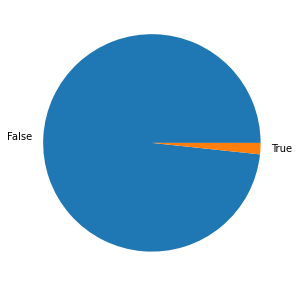

In [27]:
f, ax = plt.subplots(1,1,figsize=(10,5))

print(f'Rows number: {df.shape[0]:,.0f}\nColumns number: {df.shape[1]:,.0f}\n')
dup_df = df.duplicated(keep='first').value_counts(dropna=False).reset_index().rename(columns={'index':'duplicated',0:'#'})
dup_df['%'] = dup_df['#'].apply(lambda x: f'{x/dup_df["#"].sum():.1%}')

pie = ax.pie(dup_df['#'], labels=dup_df['duplicated'])

dup_df

**Note**:
1. The full dataset have 185.908 rows.
2. There are 3.132 (1.7%) duplicated rows from the full data set.

### ¿How many times the same row can be duplicated?

In [28]:
df['row_indicator'] = 1
dup_df = df.groupby(list(df.columns)[:-1], as_index=False)[list(df.columns)[-1:]].count()['row_indicator'].value_counts(dropna=False).reset_index().sort_values(by='index')
print(f"Númber of duplicated rows: {dup_df.query('index > 1')['row_indicator'].sum()}")
df.drop(columns='row_indicator')
dup_df

Númber of duplicated rows: 2251


,index,row_indicator
0,1,180525
1,2,1807
2,3,272
3,4,91
4,5,32
5,6,15
6,7,13
7,8,6
8,9,4
15,10,1


**Note**: Understanding that a row represents one transaction made by a client of a merchant (***merchant_name***) with a credit card (***card_number***), and seeing that a row can be duplicated from two to thirty nine times, i decided to delete the duplicated rows from the dataset.

In [29]:
print(f'Shape of df before drop duplicated rows: {df.shape}')
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
print(f'Shape of df after drop duplicated rows: {df.shape}')
df.info()
df.head()

Shape of df before drop duplicated rows: (185908, 12)
Shape of df after drop duplicated rows: (182776, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182776 entries, 0 to 182775
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 182776 non-null  object 
 1   sheet_name                182776 non-null  object 
 2   trans_date                182776 non-null  object 
 3   original_gross_amt        182776 non-null  float64
 4   merchant_name             182776 non-null  object 
 5   card_number               182776 non-null  object 
 6   trans_cac_code_1_imputed  182776 non-null  object 
 7   trans_cac_desc_1_imputed  182776 non-null  object 
 8   trans_cac_code_2_imputed  182776 non-null  object 
 9   trans_cac_desc_2_imputed  182776 non-null  object 
 10  directorate_completed     182776 non-null  object 
 11  row_indicator             182776 non-null  int64 

,file_name,sheet_name,trans_date,original_gross_amt,merchant_name,card_number,trans_cac_code_1_imputed,trans_cac_desc_1_imputed,trans_cac_code_2_imputed,trans_cac_desc_2_imputed,directorate_completed,row_indicator
0,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-03,72.61,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,Adult & Communities,1
1,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-24,85.51,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,Adult & Communities,1
2,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-02-01,10.09,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,Adult & Communities,1
3,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-04,20.00,mibsons service st,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,Adult & Communities,1
4,cusersfinainmndesktoppublish-copy-january-2017...,Sheet1,2017-01-05,50.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,Adult & Communities,1


### Droping code_columns

In [30]:
df.drop(columns=['trans_cac_code_1_imputed', 'trans_cac_code_2_imputed', 'row_indicator'], inplace=True)

### Merchant Names

Fixing date format for column **trans_date**

In [31]:
df['trans_date'] = pd.to_datetime(df['trans_date'], format='%Y-%m-%d')
print(f"Transactions from {df['trans_date'].min().strftime('%Y-%m-%d')} to {df['trans_date'].max().strftime('%Y-%m-%d')}")

diff = relativedelta.relativedelta(df['trans_date'].max(), df['trans_date'].min())
years = diff.years
months = diff.months
days = diff.days

print(f'Diference in dates: {years} years, {months} months and {days} days')

Transactions from 2013-11-12 to 2018-02-05
Diference in dates: 4 years, 2 months and 24 days


In [32]:
df_merchants = df.groupby(
    ['merchant_name'],
    as_index=False
)['original_gross_amt'].agg(['sum', 'count']).reset_index().rename(columns={'sum':'gross_amt','count':'n_trans'}).sort_values(by=['gross_amt', 'n_trans'], ascending=False)
df_merchants.info()
df_merchants.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15856 entries, 12397 to 2734
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   merchant_name  15856 non-null  object 
 1   gross_amt      15856 non-null  float64
 2   n_trans        15856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 495.5+ KB


,merchant_name,gross_amt,n_trans
12397,the furnishing service,7496739.25,388
12941,travelodge gb0000,5850598.33,5366
12951,travelodge website,2629995.71,3889
4637,hmcourts-service.g,1036817.80,464
2182,civil justice cent,646513.00,737


### Ploting merchants by number of transactions in all the period

<AxesSubplot:title={'center':'Boxplot of # of Transactions'}>

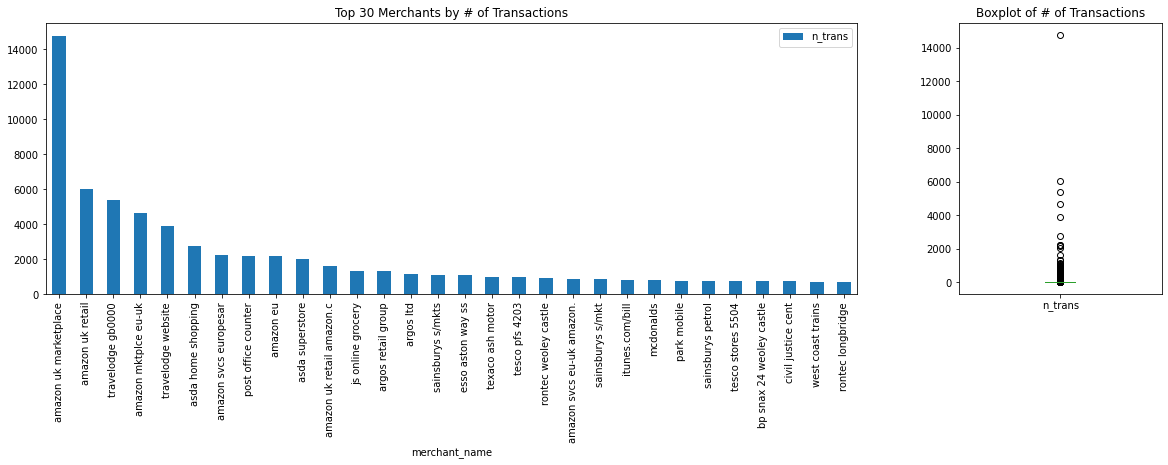

In [33]:
f, (barplot, boxplot) = plt.subplots(1,2,figsize=(20,5), gridspec_kw={"width_ratios": (0.8, 0.2)})
df_merchants.sort_values(by='n_trans', ascending=False).head(30).plot(kind='bar', x='merchant_name', y='n_trans', title='Top 30 Merchants by # of Transactions', ax=barplot)
df_merchants.plot(kind='box', y='n_trans', title='Boxplot of # of Transactions', ax=boxplot)

**Notes**:
1. Amazon is the merchant that have the biggest number of transactions asociated, but the name of the merchant appears to need an adjustment to unify the diferent amazon Names. in all the visible names in the top 30 merchants looks like Amazon is the pattern in the name, in the next step we will use it to fix the data quality.
2. Will do the same with others visible merchants in the top 30.

In [40]:
corrections = [('amazon', 'Amazon'), ('travelodge', 'Travelodge'), ('asda', 'Asda'), ('argos', 'Argos'), ('esso', 'ESSO'), ('texaco', 'Texaco'), ('sainsburys', 'Sainsburys'), ('tesco', 'Tesco'),
               ('itunes', 'Itunes'), ('mcdonalds', 'MCDonalds'), ('weoley castle', 'Weoley Castle'), ('w m morrison', 'WM Morrison'), ('ikea', 'Ikea'), ('currys', 'Currys')]

for pattern, correction in corrections:
    df['merchant_name'] = df['merchant_name'].apply(lambda x: correction if pattern in x.lower() else x)

Number of unique merchants: 15231


<AxesSubplot:title={'center':'Boxplot of # of Transactions'}>

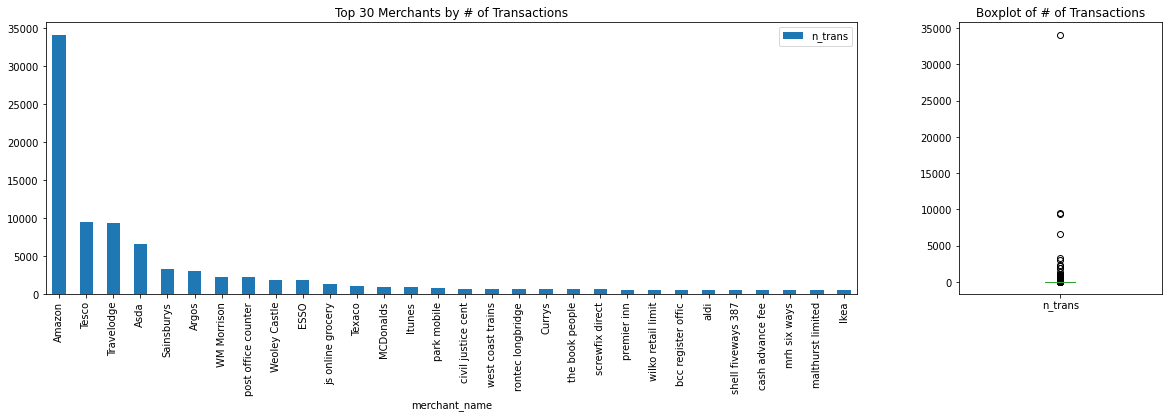

In [41]:
df_merchants = df.groupby(
    ['merchant_name'],
    as_index=False
)['original_gross_amt'].agg(['sum', 'count']).reset_index().rename(columns={'sum':'gross_amt','count':'n_trans'}).sort_values(by=['gross_amt', 'n_trans'], ascending=False)

print(f'Number of unique merchants: {df_merchants.shape[0]}')

f, (barplot, boxplot) = plt.subplots(1,2,figsize=(20,5), gridspec_kw={"width_ratios": (0.8, 0.2)})
df_merchants.sort_values(by='n_trans', ascending=False).head(30).plot(kind='bar', x='merchant_name', y='n_trans', title='Top 30 Merchants by # of Transactions', ax=barplot)
df_merchants.plot(kind='box', y='n_trans', title='Boxplot of # of Transactions', ax=boxplot)

### Ploting merchants by gross amount of transactions in all the period

<AxesSubplot:title={'center':'Boxplot of Gross Amount'}>

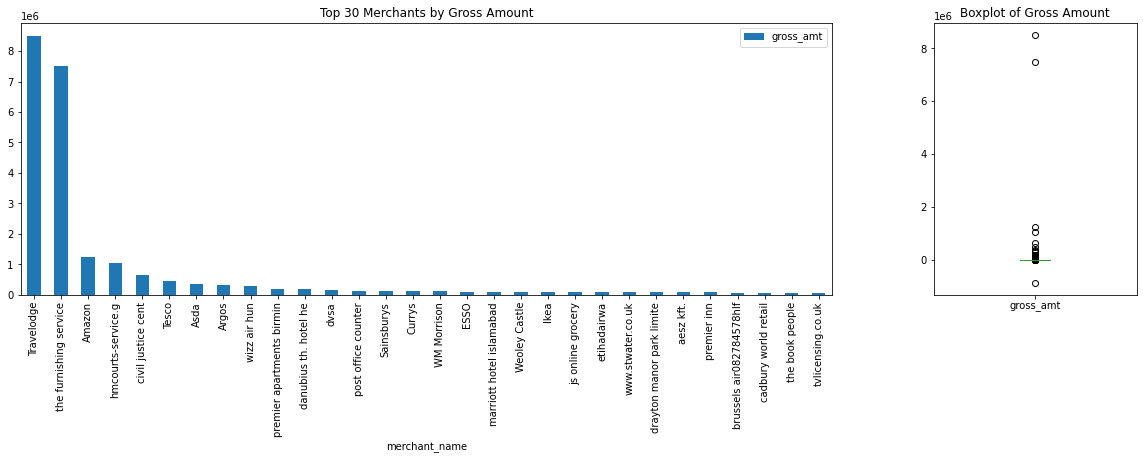

In [42]:
f, (barplot, boxplot) = plt.subplots(1,2,figsize=(20,5), gridspec_kw={"width_ratios": (0.8, 0.2)})
df_merchants.sort_values(by='gross_amt', ascending=False).head(30).plot(kind='bar', x='merchant_name', y='gross_amt', title='Top 30 Merchants by Gross Amount', ax=barplot)
df_merchants.plot(kind='box', y='gross_amt', title='Boxplot of Gross Amount', ax=boxplot)

### Saving prepared dataframe

In [43]:
df.to_csv('../data/interim/prepared_consolidated_data.csv', sep='~', encoding='utf-8', index=False)